In [159]:
import pandas as pd
from matplotlib.pyplot import matplotlib as matp

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura dos dados

In [160]:
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2021_Parte1_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2021_Parte2_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv

--2022-06-10 02:47:28--  https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62493275 (60M) [text/plain]
Saving to: ‘HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv.6’

HIST_PAINEL_COVIDBR 100%[===================>]  59.60M   169MB/s    in 0.4s    

2022-06-10 02:47:33 (169 MB/s) - ‘HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv.6’ saved [62493275/62493275]

--2022-06-10 02:47:33--  https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv
Resolving raw.githubusercontent.com (raw.githubuserconten

In [161]:
covid2020P1 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2020P2 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv",error_bad_lines=False,sep=";")
covid2021P1 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2021_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2021P2 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2021_Parte2_03jun2022.csv",error_bad_lines=False,sep=";")
covid2022 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2020 = pd.concat([covid2020P1,covid2020P2])
covid2021 = pd.concat([covid2021P1,covid2021P2])



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# Análise exploratória

## Demonstração dos nomes das colunas dos dataframes

In [162]:
covid2020.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

# Tipos de dados do dataframe

In [163]:
covid2020.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado              int64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

# Primeiras 10 linhas do dataframe
É possível perceber que existem muitos valores nulos em alguns colunas, isto por que além dos dados de cada região do
Brásil, também temos dados de todo o Brasil, dessa forma iremos dividir o dataframe, um que terá muitos valores nulos, mas monstrando
os dados do país todo, e outro com dados de regiões do Brasil.

In [164]:
covid2020.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125.0,2,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125.0,2,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125.0,2,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125.0,3,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125.0,7,4,0,0,4.0,3.0,NaN


Aqui é possível perceber que o Brasil se encontra na coluna região

In [165]:
covid2020['regiao'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

# Limpeza dos Dados

## Realizando a limpeza dos dados referente ao Brasil

Quando a região é Brasil, temos que os dados referentes a essa linha se refere ao Brasil inteiro.

In [166]:
DadosBrasil2020 = covid2020[covid2020['regiao'] == 'Brasil']
DadosBrasil2021 = covid2021[covid2021['regiao'] == "Brasil"]
DadosBrasil2022 = covid2022[covid2022['regiao'] == 'Brasil']

In [167]:
#mudando a coluna do nome região para pais, já que só teremos os dados do Brasil
DadosBrasil2020.rename(columns = {'regiao':'pais'}, inplace = True)
DadosBrasil2021.rename(columns = {'regiao':'pais'}, inplace = True)
DadosBrasil2022.rename(columns = {'regiao':'pais'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [168]:
DadosBrasil2022

,pais,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0,NaN
150,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0,NaN
151,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0,NaN
152,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0,NaN


Agora iremos eliminar as colunas que tem valores nulos dos dataframes do Brasil

In [169]:
for i in ["estado","municipio","codmun","codRegiaoSaude","nomeRegiaoSaude","interior/metropolitana"]:
  DadosBrasil2020 = DadosBrasil2020.drop(columns=[i])
  DadosBrasil2021 = DadosBrasil2021.drop(columns=[i])
  DadosBrasil2022 = DadosBrasil2022.drop(columns=[i])

In [170]:
DadosBrasil2022

,pais,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,76,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0
1,Brasil,76,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0
2,Brasil,76,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0
3,Brasil,76,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0
4,Brasil,76,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0
...,...,...,...,...,...,...,...,...,...,...,...
149,Brasil,76,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0
150,Brasil,76,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0
151,Brasil,76,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0
152,Brasil,76,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0


Nos dataframes do Brasil é possível perceber que a coluna 'coduf' não é nula, mas retorna o mesmo valor, valor esse que não serão utilizados nesta análise

In [171]:
print(DadosBrasil2020['coduf'],DadosBrasil2021['coduf'], DadosBrasil2022['coduf'])


0      76
1      76
2      76
3      76
4      76
       ..
148    76
149    76
150    76
151    76
152    76
Name: coduf, Length: 311, dtype: int64 0      76
1      76
2      76
3      76
4      76
       ..
179    76
180    76
181    76
182    76
183    76
Name: coduf, Length: 365, dtype: int64 0      76
1      76
2      76
3      76
4      76
       ..
149    76
150    76
151    76
152    76
153    76
Name: coduf, Length: 154, dtype: int64


Então a coluna 'coduf' será removida dos dataframes

In [172]:
DadosBrasil2020 = DadosBrasil2020.drop(columns=['coduf'])
DadosBrasil2021 = DadosBrasil2021.drop(columns=['coduf'])
DadosBrasil2022 = DadosBrasil2022.drop(columns=['coduf'])

# Resultado obtido a partir da limpeza dos dados (Brasil)

In [173]:
DadosBrasil2022

,pais,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0
1,Brasil,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0
2,Brasil,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0
3,Brasil,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0
4,Brasil,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0
...,...,...,...,...,...,...,...,...,...,...
149,Brasil,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0
150,Brasil,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0
151,Brasil,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0
152,Brasil,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0


# Selecionando os dados das regiões do Brasil nos anos de 2020, 2021 e 2022.

In [174]:
RegioesBrasil2020 = covid2020[covid2020['regiao'] != 'Brasil']
RegioesBrasil2021 = covid2021[covid2021['regiao'] != 'Brasil']
RegioesBrasil2022 = covid2022[covid2022['regiao'] != 'Brasil']

# Regiões do Brasil em 2020

In [175]:
RegioesBrasil2020

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN
161,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN
162,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,NaN,NaN,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,NaN,NaN,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,NaN,NaN,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,NaN,NaN,1.0


# Regiões do Brasil em 2021

In [176]:
RegioesBrasil2021

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
181,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-01,53,1777225.0,95999.0,270,1822,5,NaN,NaN,NaN
182,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-02,53,1777225.0,96433.0,434,1825,3,NaN,NaN,NaN
183,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-03,1,1777225.0,96906.0,473,1832,7,NaN,NaN,NaN
184,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-04,1,1777225.0,97197.0,291,1840,8,NaN,NaN,NaN
185,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-05,1,1777225.0,97854.0,657,1852,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033891,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-27,52,3015268.0,519103.0,225,11100,5,NaN,NaN,1.0
1033892,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-28,52,3015268.0,519196.0,93,11104,4,NaN,NaN,1.0
1033893,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-29,52,3015268.0,519346.0,150,11105,1,NaN,NaN,1.0
1033894,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-30,52,3015268.0,519546.0,200,11107,2,NaN,NaN,1.0


# Regiões do Brasil em 2022

In [177]:
RegioesBrasil2022

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
154,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-01,52,1777225.0,284660.0,34,6737,3,NaN,NaN,NaN
155,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-02,1,1777225.0,284692.0,32,6739,2,NaN,NaN,NaN
156,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-03,1,1777225.0,284783.0,91,6742,3,NaN,NaN,NaN
157,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-04,1,1777225.0,285037.0,254,6745,3,NaN,NaN,NaN
158,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-05,1,1777225.0,285269.0,232,6748,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-30,22,3015268.0,708552.0,2604,11691,1,NaN,NaN,1.0
865322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-31,22,3015268.0,710694.0,2142,11691,0,NaN,NaN,1.0
865323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-01,22,3015268.0,712968.0,2274,11692,1,NaN,NaN,1.0
865324,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-02,22,3015268.0,715938.0,2970,11692,0,NaN,NaN,1.0


# Contagem dos pacientes recuperados da COVID-19

In [178]:
#Verificando se existem algum valor não nulo na coluna recuperadosnovos dos dataframes de regiões
value1 = RegioesBrasil2022['Recuperadosnovos'].count()
value2 = RegioesBrasil2021['Recuperadosnovos'].count()
value3 = RegioesBrasil2020['Recuperadosnovos'].count()
print("RecuperadosNovaos:",value1, value2, value3)

value1 = RegioesBrasil2022['emAcompanhamentoNovos'].count()
value2 = RegioesBrasil2021['emAcompanhamentoNovos'].count()
value3 = RegioesBrasil2020['emAcompanhamentoNovos'].count()
print("emAcompanhamentoNovos:",value1, value2, value3)


RecuperadosNovaos: 0 0 0
emAcompanhamentoNovos: 0 0 0


Apagando as colunas nulas dos dataframes de regiões

In [179]:
#Colunas nulas deletadas
for i in ['Recuperadosnovos','emAcompanhamentoNovos']:

  RegioesBrails2022 = RegioesBrails2022.drop(columns=[i])
  RegioesBrasil2021 = RegioesBrasil2021.drop(columns=[i])
  RegioesBrasil2020 = RegioesBrasil2020.drop(columns=[i])


In [180]:
RegioesBrasil2020

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN
161,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN
162,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,1.0


## Visualização de Dados

## Média de casos novos de Covid em cada região do Brasil nos anos de 2020, 2021 e 2022

MÉDIA DE CASOS NOVOS EM 2020
regiao
Centro-Oeste    13.182418
Nordeste         7.470494
Norte           13.318400
Sudeste         11.453187
Sul              8.106254
Name: casosNovos, dtype: float64


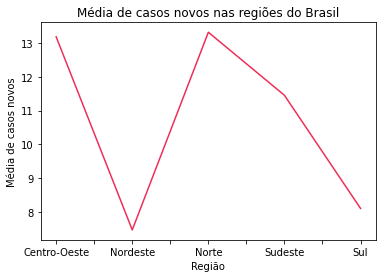

In [202]:
df_covid2020 = RegioesBrasil2020.groupby('regiao')
mediaCasosNovos2020 = df_covid2020['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2020")
print(mediaCasosNovos2020)
print("="*30)

df_covid2020.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()


MÉDIA DE CASOS NOVOS EM 2021
regiao
Centro-Oeste    17.701237
Nordeste         9.235051
Norte           12.683276
Sudeste         19.533468
Sul             13.687786
Name: casosNovos, dtype: float64


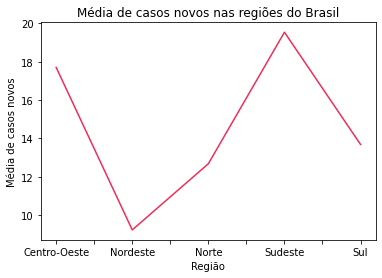

In [203]:
df_covid2021 = RegioesBrasil2021.groupby('regiao')
mediaCasosNovos2021 = df_covid2021['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2021")
print(mediaCasosNovos2021)
print("="*30)

df_covid2021.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()


MÉDIA DE CASOS NOVOS EM 2022
regiao
Centro-Oeste    26.616238
Nordeste         9.554292
Norte           16.576934
Sudeste         27.620882
Sul             25.993881
Name: casosNovos, dtype: float64


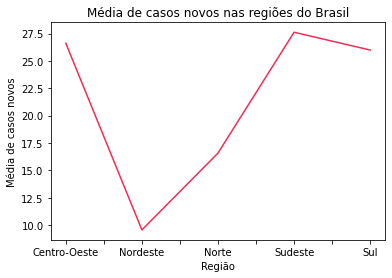

In [204]:
df_covid2022 = RegioesBrasil2022.groupby('regiao')
mediaCasosNovos2022 = df_covid2022['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2022")
print(mediaCasosNovos2022)
print("="*30)

df_covid2022.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()

## Quantidade de casos novos em cada região nos anos de 2020, 2021 e 2022.




In [182]:
df_covid2020 = covid2020.groupby('regiao')
casosNovos2020 = df_covid2020['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2020")
print(casosNovos2020)
print("="*30)
df_covid2021 = covid2021.groupby('regiao')
casosNovos2021 = df_covid2021['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2021")
print(casosNovos2021)
print("="*30)
df_covid2022 = covid2020.groupby('regiao')
casosNovos2022 = df_covid2022['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2022")
print(casosNovos2022)
print("="*30)


QUANTIDADE DE CASOS NOVOS EM 2020
regiao
Brasil          7675973
Centro-Oeste    1747514
Nordeste        3792314
Norte           1718300
Sudeste         5376172
Sul             2717646
Name: casosNovos, dtype: int64
QUANTIDADE DE CASOS NOVOS EM 2021
regiao
Brasil          14611548
Centro-Oeste     3056030
Nordeste         6107878
Norte            2129522
Sudeste         11949404
Sul              5980262
Name: casosNovos, dtype: int64
QUANTIDADE DE CASOS NOVOS EM 2022
regiao
Brasil          7675973
Centro-Oeste    1747514
Nordeste        3792314
Norte           1718300
Sudeste         5376172
Sul             2717646
Name: casosNovos, dtype: int64
